In [1]:

#train(model,loss_func,X,y,epochs=1000,batch_size = 32,lr=0.01):
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from dynamic_architect import Neural_Network
from data.generate import generate_circle_data 
from layers import Linear 
from activations import ReLU , Sigmoid
from losses import BCE 
from train_loop import train ,show_loss
import numpy as np

np.set_printoptions(suppress=True) 
testing = Neural_Network([2,16,1]) 
model = testing.layers 
X,y =  generate_circle_data(2000,0.5,42)
loss_func = BCE()
loss_history = train(model,loss_func,X,y,1000,32,0.001) 
batch_per_epoch = int(np.ceil(len(X) / 32))
epoch_loss = [
    np.mean(loss_history[i*batch_per_epoch:(i+1)*batch_per_epoch])
    for i in range(1000)
]
show_loss(epoch_loss ,50) 
 



EPOCHS : 0 | LOSS:  0.663232443935211
EPOCHS : 50 | LOSS:  0.15080530356222585
EPOCHS : 100 | LOSS:  0.1033131405275493
EPOCHS : 150 | LOSS:  0.08295485262066662
EPOCHS : 200 | LOSS:  0.07100544782725068
EPOCHS : 250 | LOSS:  0.06379042810388191
EPOCHS : 300 | LOSS:  0.058171995581054646
EPOCHS : 350 | LOSS:  0.05389595495779278
EPOCHS : 400 | LOSS:  0.05042604134189604
EPOCHS : 450 | LOSS:  0.04712438492847523
EPOCHS : 500 | LOSS:  0.045095873217564905
EPOCHS : 550 | LOSS:  0.04255741183072452
EPOCHS : 600 | LOSS:  0.04056981033847653
EPOCHS : 650 | LOSS:  0.03959811703482325
EPOCHS : 700 | LOSS:  0.03814572835685569
EPOCHS : 750 | LOSS:  0.036690273379957235
EPOCHS : 800 | LOSS:  0.035623414812640024
EPOCHS : 850 | LOSS:  0.03407429060153134
EPOCHS : 900 | LOSS:  0.03336048027055023
EPOCHS : 950 | LOSS:  0.03245137935086952


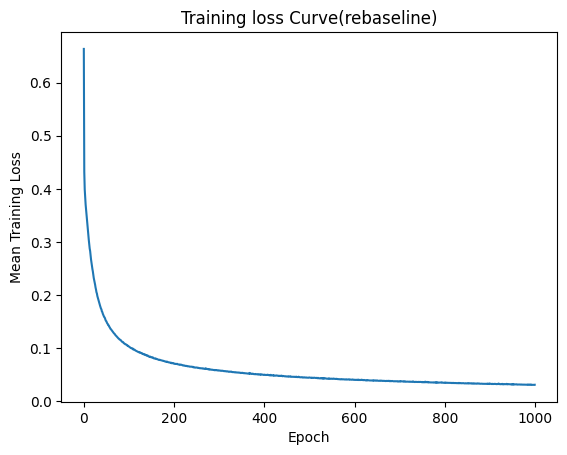

In [2]:
import matplotlib.pyplot as plt 
plt.plot(epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Mean Training Loss") 
plt.title("Training loss Curve(rebaseline)")
plt.show()


In [3]:
last_100 = epoch_loss[900:]
for i in range(0,100,10): 
    print(" ".join(f"{x:8.4f}" for x in last_100[i:i+10]))

  0.0330   0.0329   0.0326   0.0324   0.0323   0.0326   0.0323   0.0323   0.0324   0.0326
  0.0324   0.0327   0.0325   0.0324   0.0322   0.0324   0.0322   0.0326   0.0323   0.0334
  0.0323   0.0325   0.0321   0.0320   0.0323   0.0325   0.0321   0.0327   0.0319   0.0323
  0.0320   0.0320   0.0325   0.0322   0.0322   0.0321   0.0320   0.0327   0.0320   0.0325
  0.0319   0.0324   0.0321   0.0318   0.0319   0.0320   0.0317   0.0318   0.0321   0.0316
  0.0323   0.0316   0.0326   0.0316   0.0317   0.0316   0.0319   0.0318   0.0322   0.0320
  0.0314   0.0315   0.0314   0.0317   0.0315   0.0315   0.0317   0.0315   0.0316   0.0313
  0.0316   0.0316   0.0313   0.0312   0.0314   0.0315   0.0312   0.0314   0.0312   0.0313
  0.0314   0.0311   0.0311   0.0314   0.0319   0.0312   0.0311   0.0313   0.0318   0.0310
  0.0312   0.0317   0.0310   0.0310   0.0310   0.0311   0.0312   0.0312   0.0309   0.0312


In [7]:
#tính accuracy
def Predict(X,model): 
    A = X 
    for layer in model: 
        A = layer.forward(A) 
    return A

y_hat = Predict(X,model) 
y_pred = (y_hat > 0.5).astype(int)
accuracy = np.mean(y_pred == y)
print(accuracy)

0.9945
